In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('Walmart (1).csv')
df

Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0         1  05-02-2010    1643690.90             0        42.31       2.572   
1         1  12-02-2010    1641957.44             1        38.51       2.548   
2         1  19-02-2010    1611968.17             0        39.93       2.514   
3         1  26-02-2010    1409727.59             0        46.63       2.561   
4         1  05-03-2010    1554806.68             0        46.50       2.625   
...     ...         ...           ...           ...          ...         ...   
6430     45  28-09-2012     713173.95             0        64.88       3.997   
6431     45  05-10-2012     733455.07             0        64.89       3.985   
6432     45  12-10-2012     734464.36             0        54.47       4.000   
6433     45  19-10-2012     718125.53             0        56.47       3.969   
6434     45  26-10-2012     760281.43             0        58.85       3.882   

             CPI  Unemployment  
0     211.096358         8.106  
1     211.242170         8.106  
2     211.289143         8.106  
3     211.319643         8.106  
4     211.350143         8.106  
...          ...           ...  
6430  192.013558         8.684  
6431  192.170412         8.667  
6432  192.327265         8.667  
6433  192.330854         8.667  
6434  192.308899         8.667  

[6435 rows x 8 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [5]:
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [6]:
df.describe().style.background_gradient(cmap='YlGnBu')

In [7]:
data=df.copy()
data.head(5)

Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1  05-02-2010    1643690.90             0        42.31       2.572   
1      1  12-02-2010    1641957.44             1        38.51       2.548   
2      1  19-02-2010    1611968.17             0        39.93       2.514   
3      1  26-02-2010    1409727.59             0        46.63       2.561   
4      1  05-03-2010    1554806.68             0        46.50       2.625   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106

In [8]:
df['Date']=pd.to_datetime(df['Date'])
df['Month']=df['Date'].dt.month
df['Day']=df['Date'].dt.weekday
df['Week'] = df['Date'].dt.week
df['Year']=df['Date'].dt.year
df.drop(['Date'],inplace=True,axis=1)

In [9]:
df

Store  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price         CPI  \
0         1    1643690.90             0        42.31       2.572  211.096358   
1         1    1641957.44             1        38.51       2.548  211.242170   
2         1    1611968.17             0        39.93       2.514  211.289143   
3         1    1409727.59             0        46.63       2.561  211.319643   
4         1    1554806.68             0        46.50       2.625  211.350143   
...     ...           ...           ...          ...         ...         ...   
6430     45     713173.95             0        64.88       3.997  192.013558   
6431     45     733455.07             0        64.89       3.985  192.170412   
6432     45     734464.36             0        54.47       4.000  192.327265   
6433     45     718125.53             0        56.47       3.969  192.330854   
6434     45     760281.43             0        58.85       3.882  192.308899   

      Unemployment  Month  Day  Week  Year  
0            8.106      5    6    17  2010  
1            8.106     12    3    48  2010  
2            8.106      2    4     7  2010  
3            8.106      2    4     8  2010  
4            8.106      5    0    18  2010  
...            ...    ...  ...   ...   ...  
6430         8.684      9    4    39  2012  
6431         8.667      5    3    19  2012  
6432         8.667     12    0    50  2012  
6433         8.667     10    4    42  2012  
6434         8.667     10    4    43  2012  

[6435 rows x 11 columns]

In [10]:
for i in df.columns:
    print(f'{i}:{df[i].nunique()}')

Store:45
Weekly_Sales:6435
Holiday_Flag:2
Temperature:3528
Fuel_Price:892
CPI:2145
Unemployment:349
Month:12
Day:7
Week:52
Year:3


In [11]:
df['Year'].value_counts().values
df['Year'].value_counts().index

Int64Index([2011, 2010, 2012], dtype='int64')

## Visualization

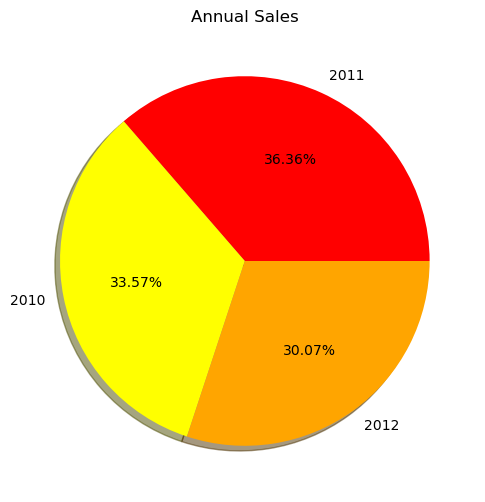

In [12]:
plt.figure(figsize=(10,6))
plt.pie(df['Year'].value_counts().values,labels=df['Year'].value_counts().index,autopct='%1.2f%%',
        colors=['red','yellow','orange'],shadow=True)
plt.title('Annual Sales')
plt.show()

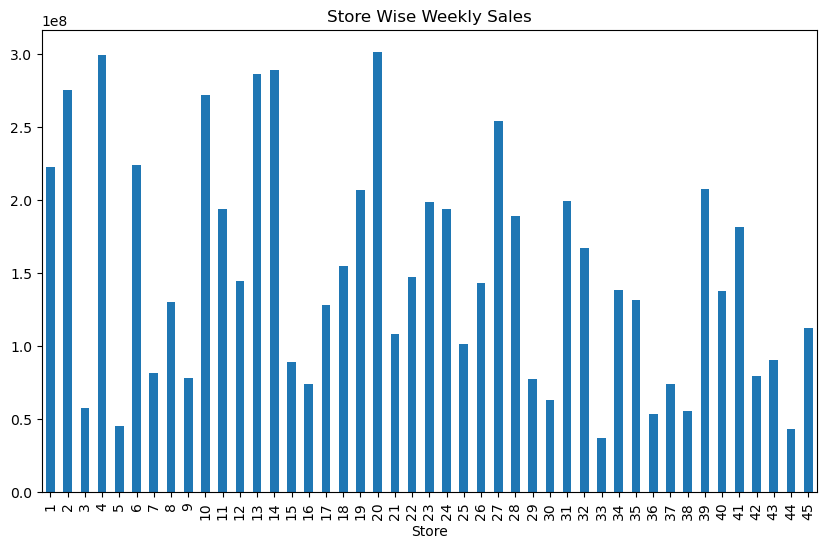

In [13]:
plt.figure(figsize=(10,6))
df.groupby(['Store'])['Weekly_Sales'].sum().plot(kind='bar')
plt.title('Store Wise Weekly Sales')
plt.show()

Text(0.5, 1.0, 'MonthWise Sales')

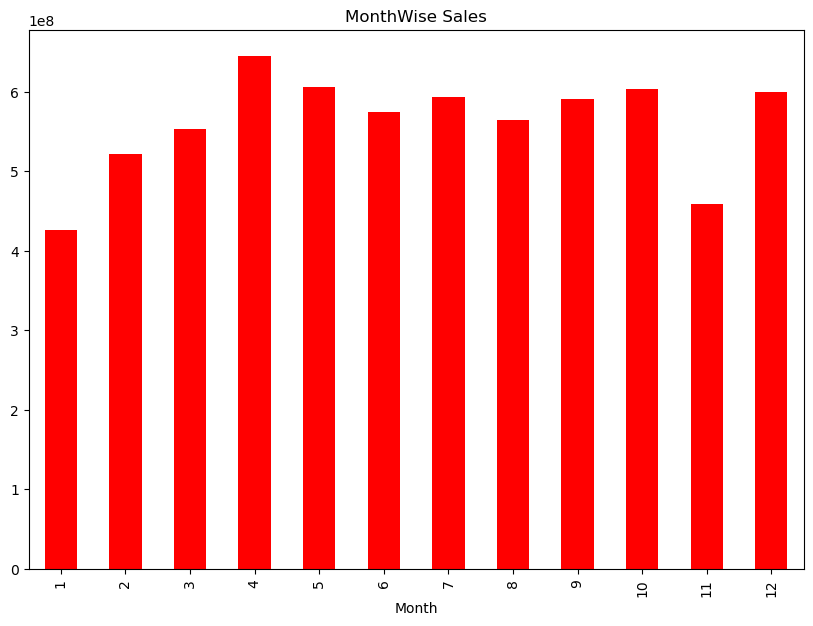

In [14]:
plt.figure(figsize=(10,7))
df.groupby(['Month'])['Weekly_Sales'].sum().plot(kind='bar',color='red')
plt.title('MonthWise Sales')

Text(0.5, 1.0, 'Yearwise Sales')

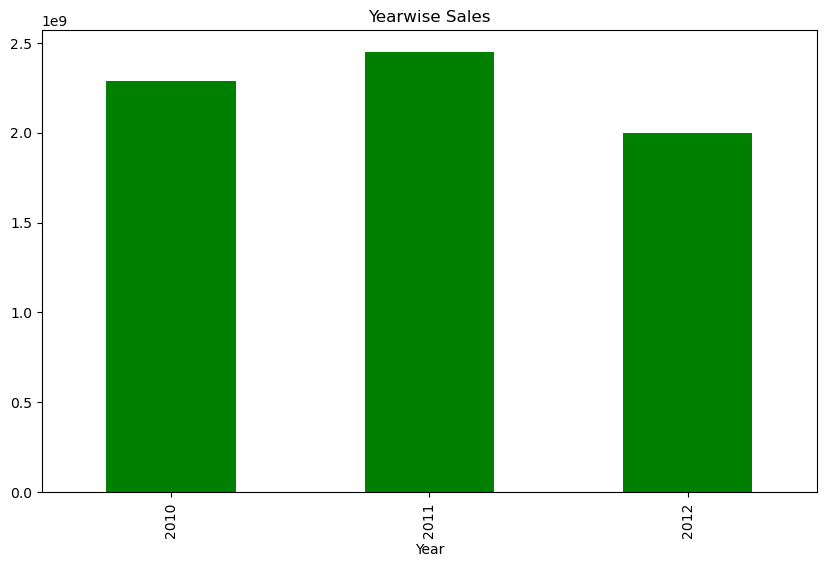

In [15]:
plt.figure(figsize=(10,6))
df.groupby(['Year'])['Weekly_Sales'].sum().plot(kind='bar',color='green')
plt.title('Yearwise Sales')

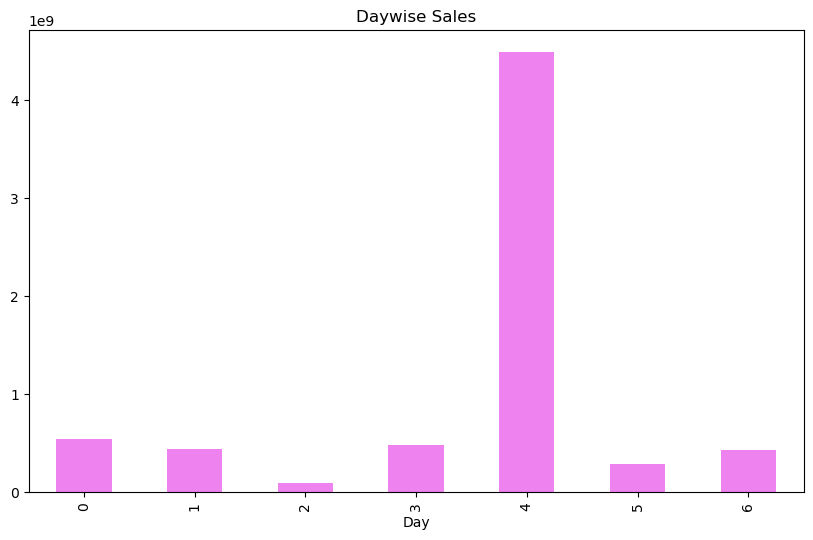

In [16]:
plt.figure(figsize=(10,6))
df.groupby(['Day'])['Weekly_Sales'].sum().plot(kind='bar',color='violet')
plt.title('Daywise Sales')
plt.show()

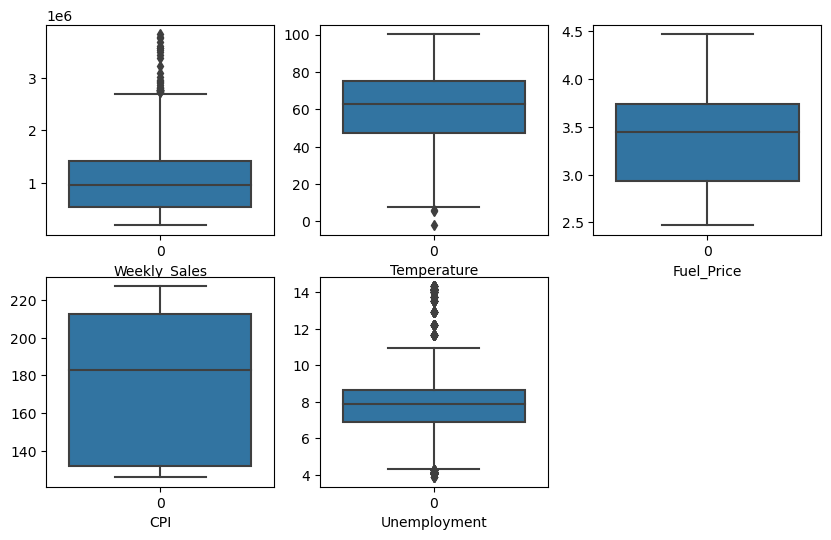

In [17]:
n=1
columns=['Weekly_Sales','Temperature','Fuel_Price','CPI','Unemployment']
plt.figure(figsize=(10,6))
for i in columns:
    if n<=5:
        plt.subplot(2,3,n);
        n+=1
        sns.boxplot(df[i])
        plt.xlabel(i)

In [18]:
cols=['Weekly_Sales','Unemployment','Temperature']
def outlier_removal(l):
    for i in cols:
        q1=df[i].quantile(0.25)
        q3=df[i].quantile(0.75)
        iqr=q3-q1
        upper=q3+1.5*iqr
        lower=q1-1.5*iqr
        df[i]=np.where(df[i]>upper,upper,(np.where(df[i]<lower,lower,df[i])))
outlier_removal(cols)

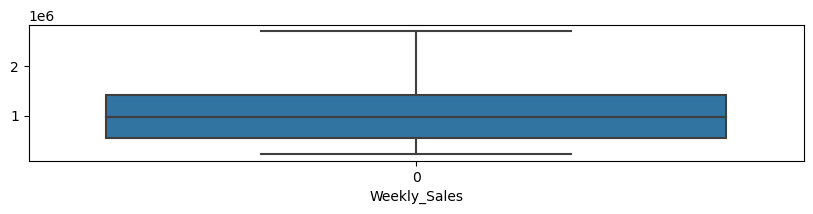

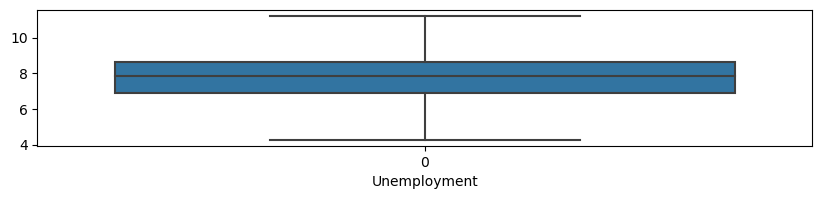

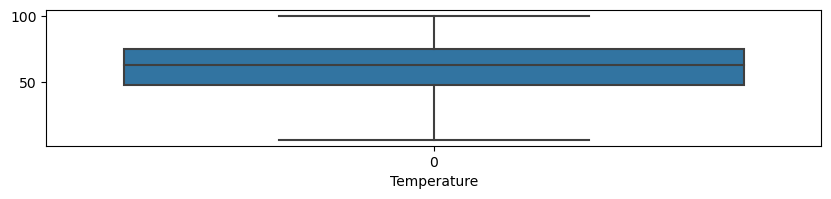

In [19]:
n=1
cols=['Weekly_Sales','Unemployment','Temperature']
for i in cols:
    plt.figure(figsize=(10,6))
    plt.subplot(3,1,n)
    n+=1
    sns.boxplot(df[i])
    plt.xlabel(i)

In [20]:
df2=df.copy()
df2.head()

Store  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price         CPI  \
0      1    1643690.90             0        42.31       2.572  211.096358   
1      1    1641957.44             1        38.51       2.548  211.242170   
2      1    1611968.17             0        39.93       2.514  211.289143   
3      1    1409727.59             0        46.63       2.561  211.319643   
4      1    1554806.68             0        46.50       2.625  211.350143   

   Unemployment  Month  Day  Week  Year  
0         8.106      5    6    17  2010  
1         8.106     12    3    48  2010  
2         8.106      2    4     7  2010  
3         8.106      2    4     8  2010  
4         8.106      5    0    18  2010

In [21]:
df2.Month.value_counts()

4     630
5     585
9     585
7     585
10    585
3     540
6     540
8     540
12    495
2     495
1     450
11    405
Name: Month, dtype: int64

In [22]:
df2.Day.value_counts()

4    4320
0     495
3     450
6     405
1     405
5     270
2      90
Name: Day, dtype: int64

In [23]:
days={0:'Sunday',1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thursday',5:'Friday',6:'Saturday'}
months={1:'Januray',2:'February',3:'March',4:'April',5:'May',6:'June',7:'July',8:'August',9:'September',
       10:'October',11:'November',12:'December'}
df2['Day']=df2['Day'].map(days)
df2['Month']=df2['Month'].map(months)

In [24]:
df2

Store  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price         CPI  \
0         1    1643690.90             0        42.31       2.572  211.096358   
1         1    1641957.44             1        38.51       2.548  211.242170   
2         1    1611968.17             0        39.93       2.514  211.289143   
3         1    1409727.59             0        46.63       2.561  211.319643   
4         1    1554806.68             0        46.50       2.625  211.350143   
...     ...           ...           ...          ...         ...         ...   
6430     45     713173.95             0        64.88       3.997  192.013558   
6431     45     733455.07             0        64.89       3.985  192.170412   
6432     45     734464.36             0        54.47       4.000  192.327265   
6433     45     718125.53             0        56.47       3.969  192.330854   
6434     45     760281.43             0        58.85       3.882  192.308899   

      Unemployment      Month        Day  Week  Year  
0            8.106        May   Saturday    17  2010  
1            8.106   December  Wednesday    48  2010  
2            8.106   February   Thursday     7  2010  
3            8.106   February   Thursday     8  2010  
4            8.106        May     Sunday    18  2010  
...            ...        ...        ...   ...   ...  
6430         8.684  September   Thursday    39  2012  
6431         8.667        May  Wednesday    19  2012  
6432         8.667   December     Sunday    50  2012  
6433         8.667    October   Thursday    42  2012  
6434         8.667    October   Thursday    43  2012  

[6435 rows x 11 columns]

Text(0.5, 1.0, 'Yearwise Distribution')

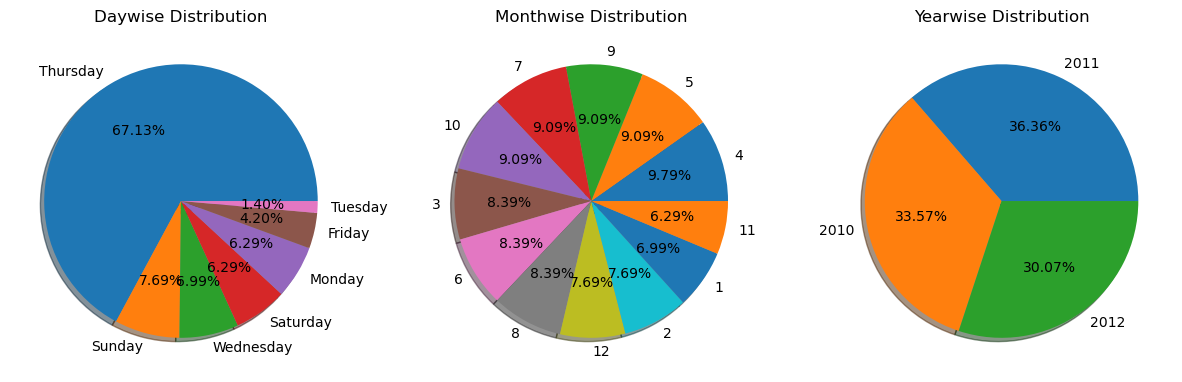

In [25]:
plt.figure(figsize=(15,6))
plt.subplot(1,3,1)
plt.pie(df2['Day'].value_counts().values,labels=df2['Day'].value_counts().index,autopct='%1.2f%%',shadow=True)
plt.title('Daywise Distribution')
plt.subplot(1,3,2)
plt.pie(df2['Month'].value_counts().values,labels=df['Month'].value_counts().index,autopct='%1.2f%%',shadow=True)
plt.title('Monthwise Distribution')
plt.subplot(1,3,3)
plt.pie(df2['Year'].value_counts().values,labels=df2['Year'].value_counts().index,autopct='%1.2f%%',shadow=True)
plt.title('Yearwise Distribution')

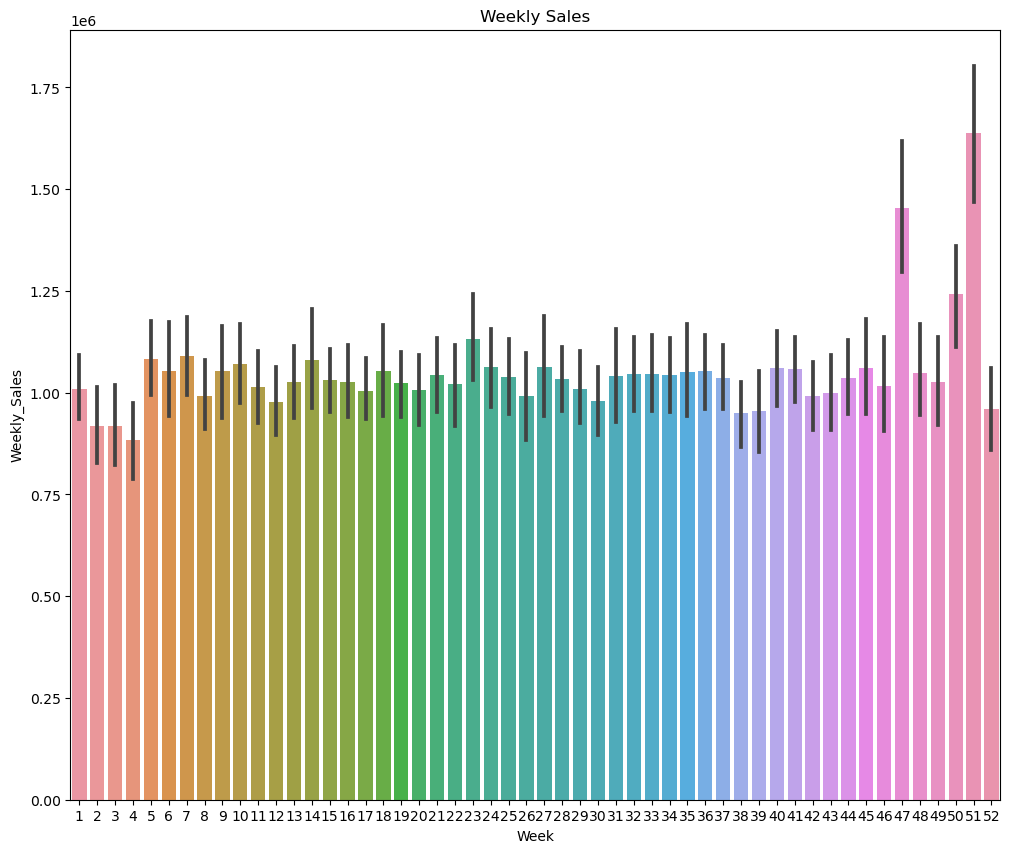

In [26]:
import seaborn as sns
plt.figure(figsize=(12,10))

sns.barplot(df2,x= 'Week',y='Weekly_Sales')
plt.title('Weekly Sales')

plt.show()

<Figure size 1500x1200 with 0 Axes>

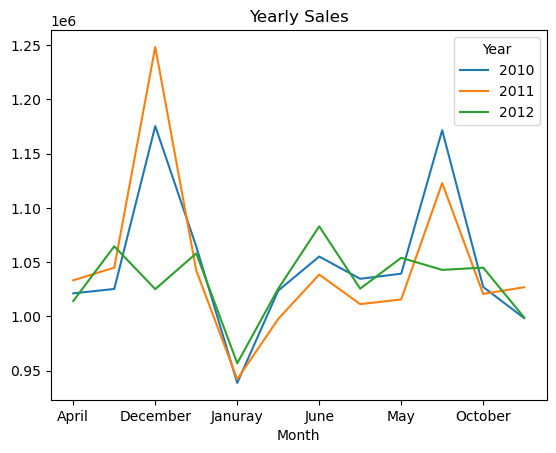

In [27]:
plt.figure(figsize=(15,12))
monthly_sales = pd.pivot_table(df2, index = "Month", columns = "Year", values = "Weekly_Sales").sort_index()
monthly_sales
monthly_sales.plot()
plt.title('Yearly Sales')
plt.show()

In [28]:
print('Minimum Sales in the Walmart: ',df2.groupby('Store')['Weekly_Sales'].sum().min())
print('Maximum Sales in the Walmart: ',df2.groupby('Store')['Weekly_Sales'].sum().max())

Minimum Sales in the Walmart:  37160221.96
Maximum Sales in the Walmart:  299066335.2575


In [29]:
df3=df2.groupby('Holiday_Flag')['Weekly_Sales'].sum()
df3

Holiday_Flag
0    6.220935e+09
1    5.038284e+08
Name: Weekly_Sales, dtype: float64

([<matplotlib.patches.Wedge at 0x236ec97a790>,
 [Text(-0.2565256729373791, -1.0696703132853715, 'Normal Week'),
  Text(0.3031667339702413, 1.2641558176956735, 'Special Holiday Week')],
 [Text(-0.1399230943294795, -0.5834565345192936, '92.51%'),
  Text(0.18656414398168694, 0.777942041658876, '7.49%')])

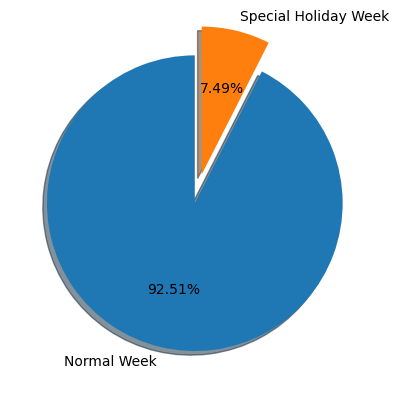

In [30]:
plt.pie(df2.groupby('Holiday_Flag')['Weekly_Sales'].sum(),labels=['Normal Week','Special Holiday Week'],autopct='%1.2f%%',
        explode=[0,0.2],
        startangle=90,shadow=True)

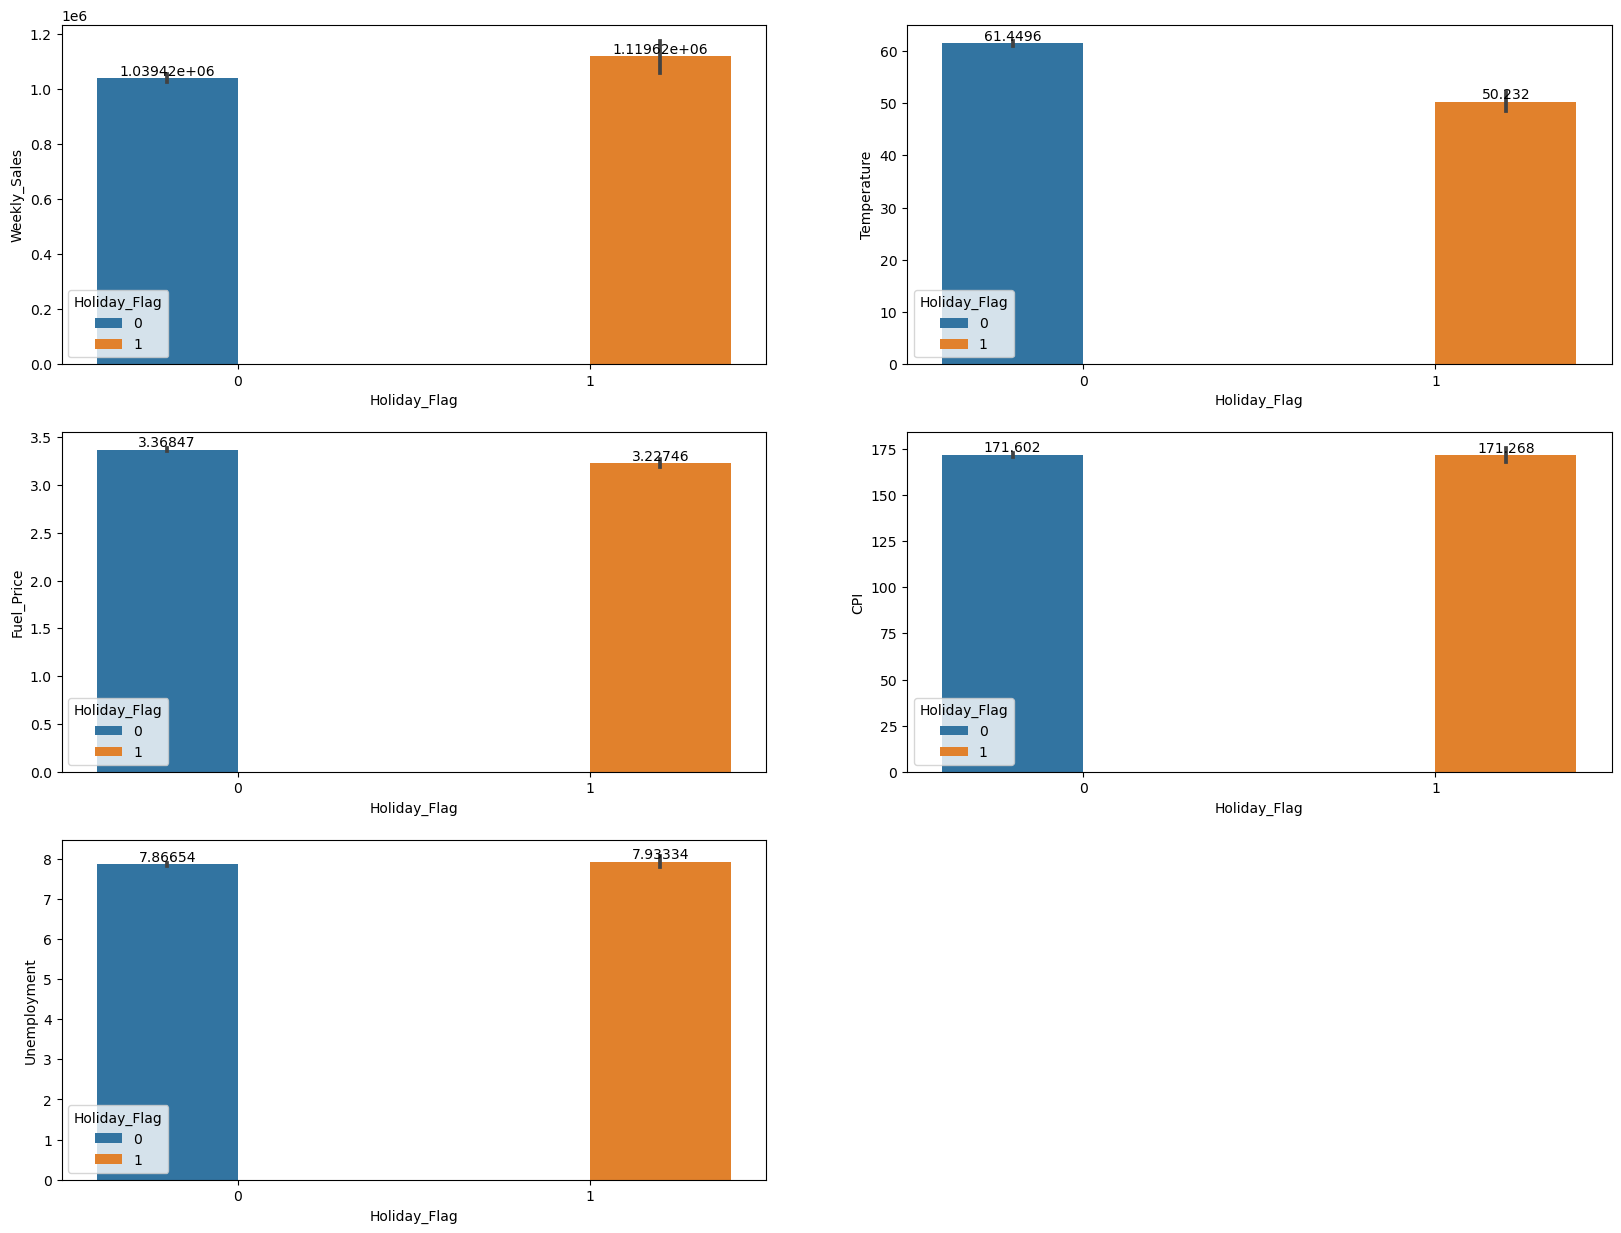

In [31]:
from numpy import mean
t = 1
plt.figure(figsize=(20,15))
for i in ["Weekly_Sales","Temperature","Fuel_Price","CPI","Unemployment"]:
        if t<=5:
            plt.subplot(3,2,t)
            ax = sns.barplot(data = df2 , x = "Holiday_Flag" ,y = i  , hue = df2.Holiday_Flag ,estimator=mean);
            t+=1
            for i in ax.containers:     #to set a label on top of the bars.
                ax.bar_label(i)

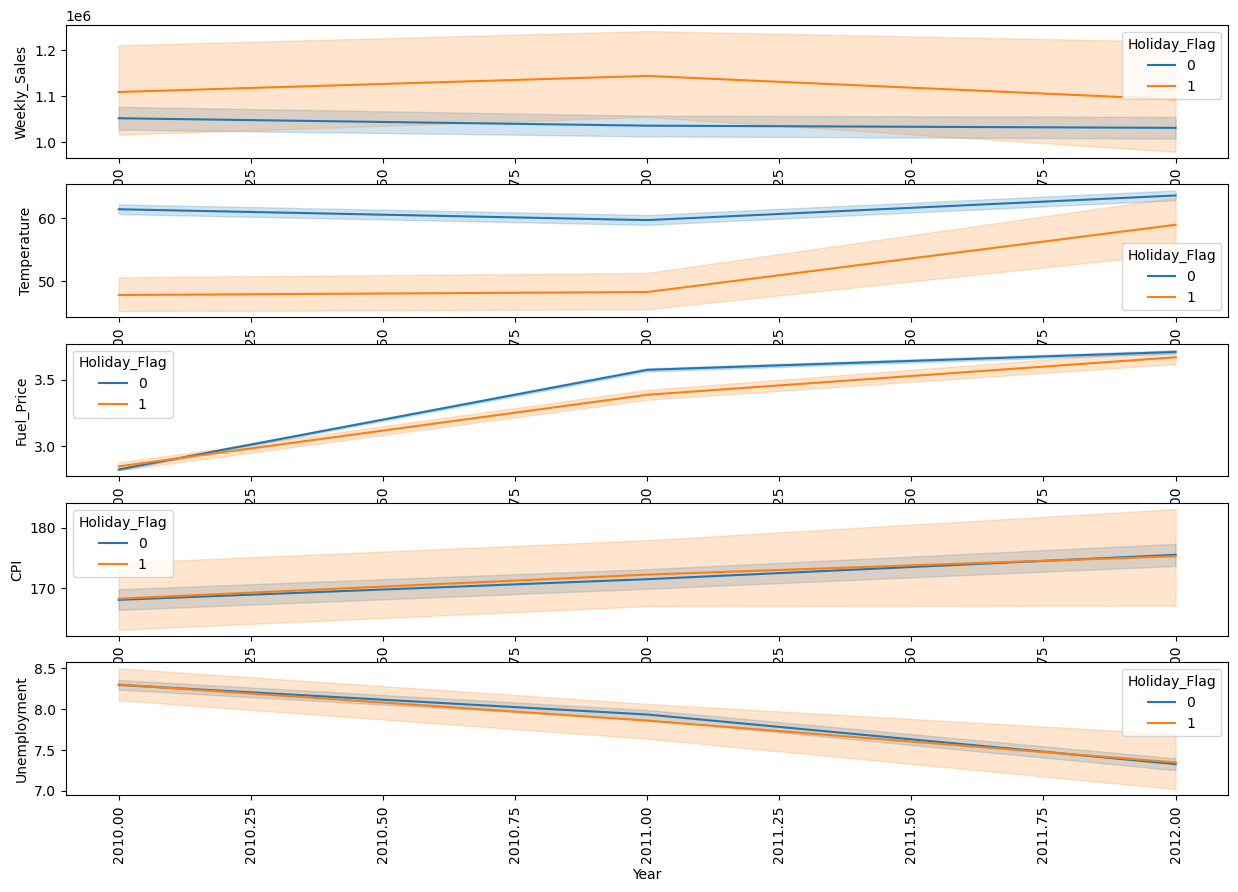

In [32]:
n = 1
plt.figure(figsize=(15,10))
for i in ["Weekly_Sales","Temperature","Fuel_Price","CPI","Unemployment"]:
        if n<=5:
            plt.subplot(5,1,n)
            ax = sns.lineplot(data = df2 , x = "Year" ,y = i  , hue = df.Holiday_Flag );
            plt.xticks(rotation = 90)
            n+=1

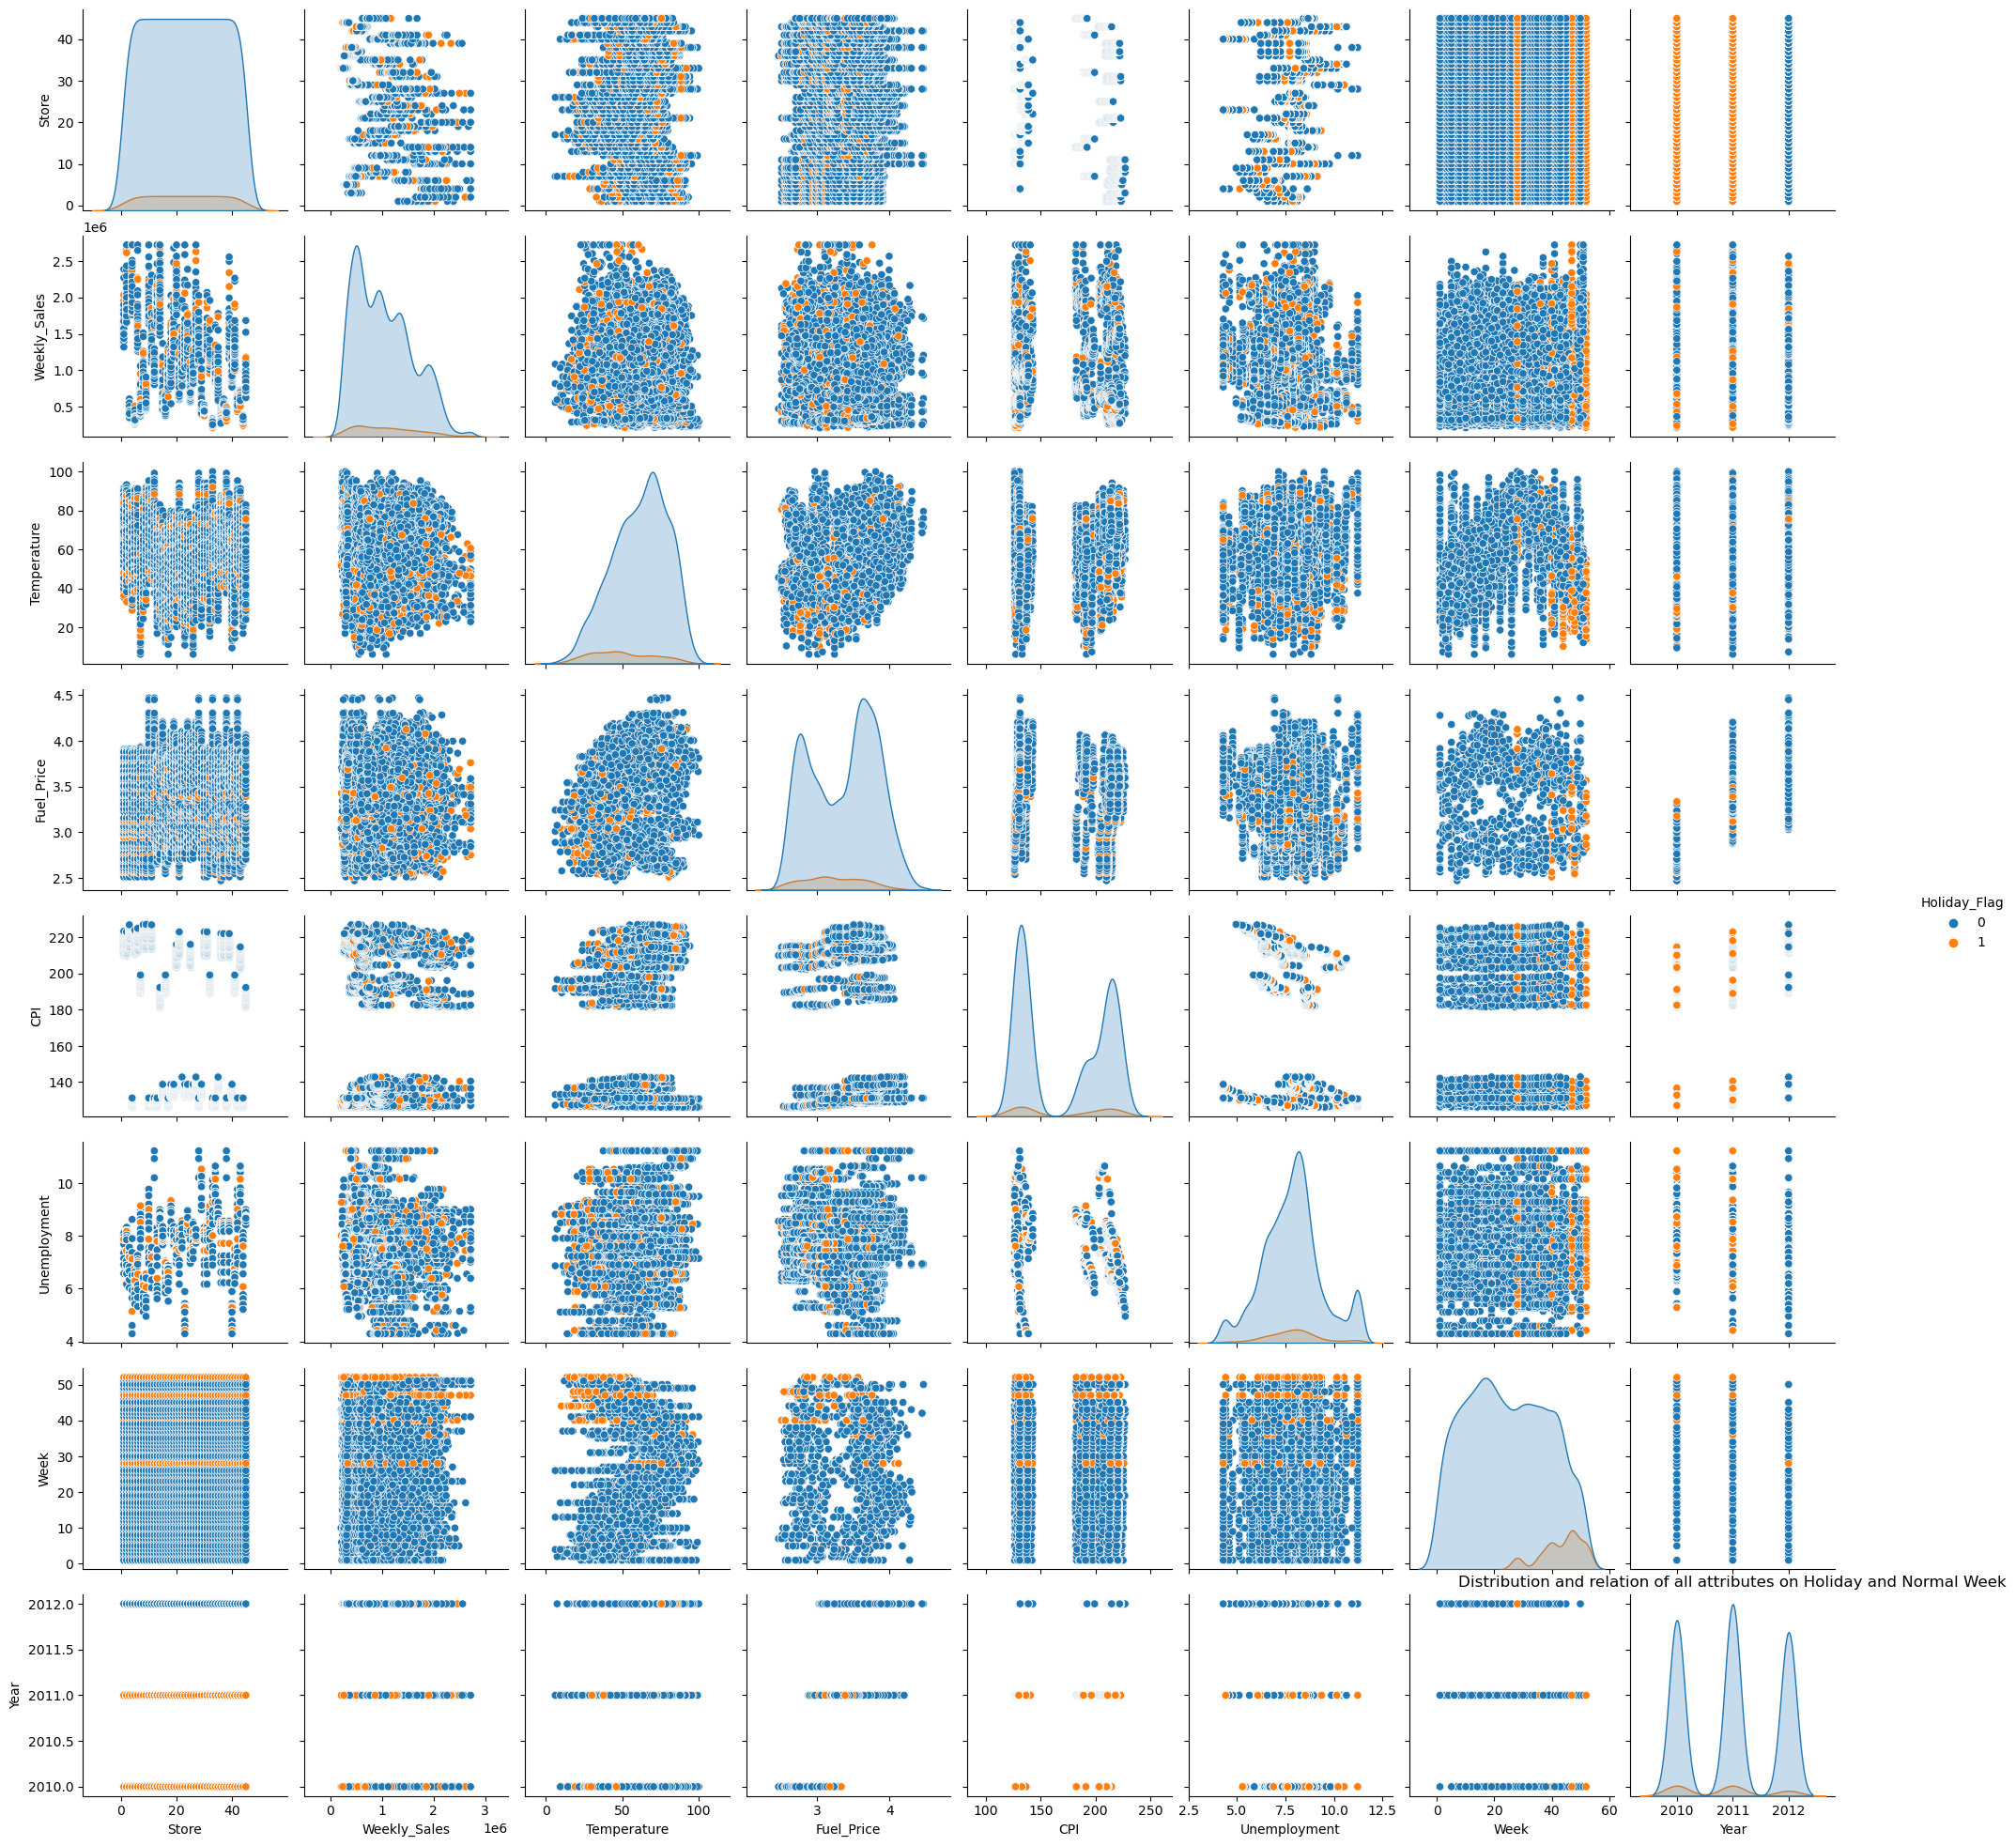

In [33]:
sns.pairplot(df2 , hue = "Holiday_Flag" );
plt.title("Distribution and relation of all attributes on Holiday and Normal Week");

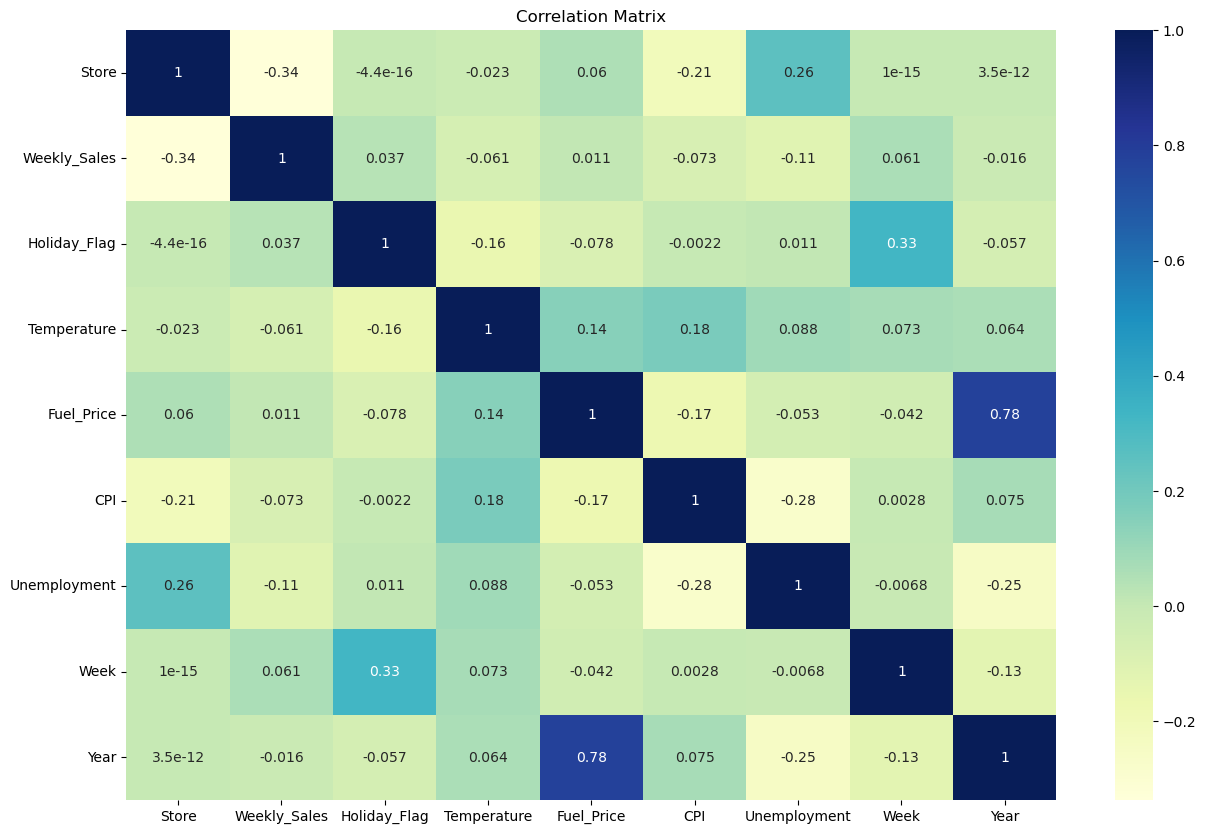

In [34]:
plt.figure(figsize = (15,10))
sns.heatmap(df2.corr(),annot=True,cmap ="YlGnBu")
plt.title('Correlation Matrix')
plt.show()

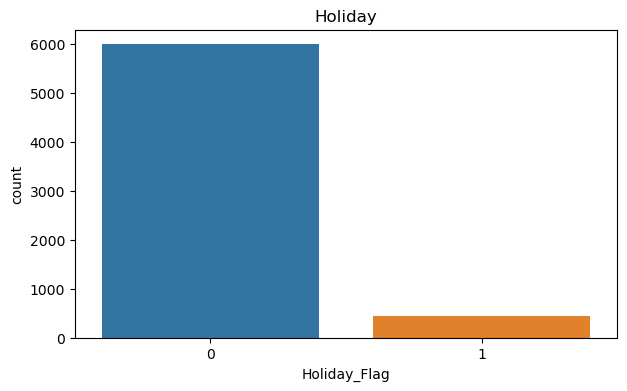

In [35]:
plt.figure(figsize=(7,4))

sns.countplot(x= df2.Holiday_Flag)
plt.title('Holiday')

plt.show()

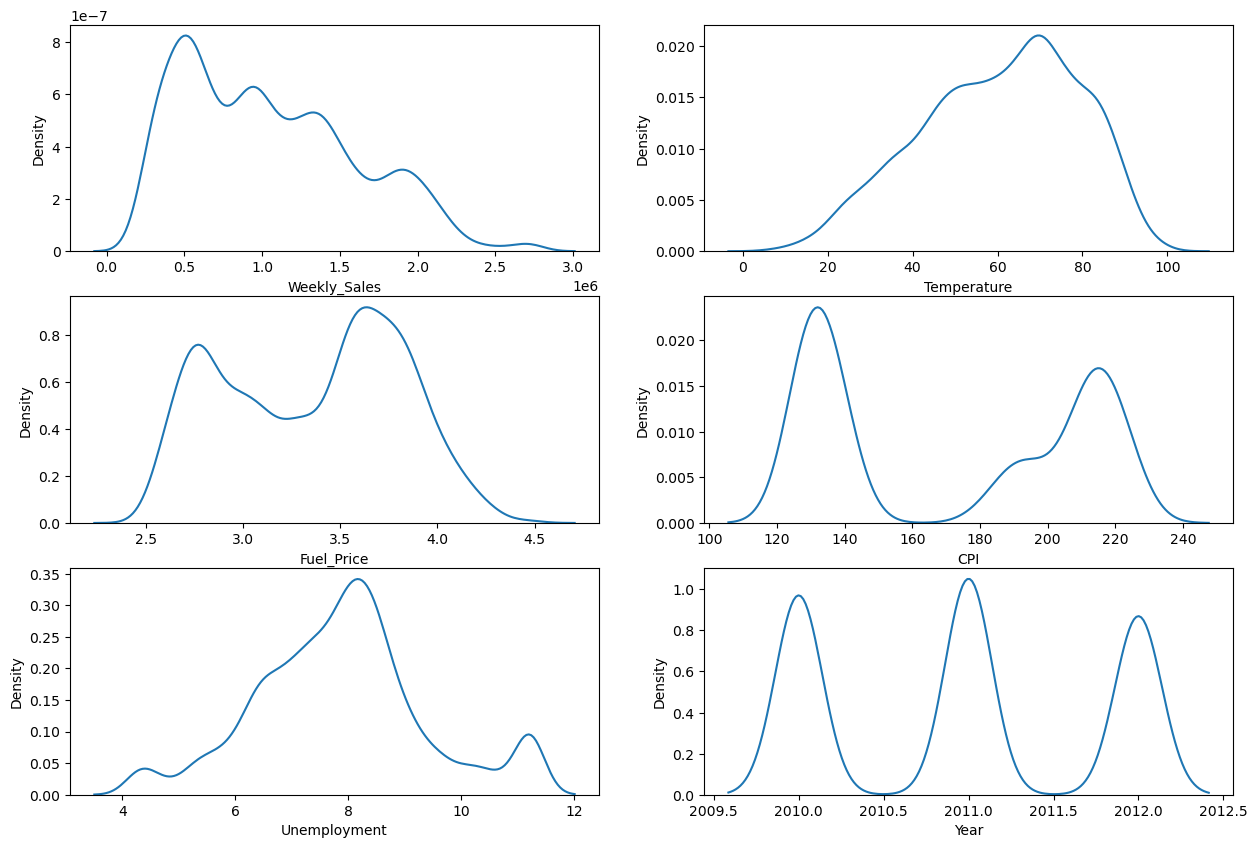

In [36]:
n = 1
plt.figure(figsize=(15,10))
for i in ['Weekly_Sales','Temperature', 'Fuel_Price','CPI', 'Unemployment','Year']:
        if n<=6:
            plt.subplot(3,2,n);
            n+=1
            sns.kdeplot(x = df2[i])
            plt.xlabel(i)

## Model Building


In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
train_data,test_data=train_test_split(df,test_size=0.20,shuffle=False)
features=['Store', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']
X_train=train_data[features]
y_train=train_data['Weekly_Sales']

In [40]:
train_data=df[:-12]
test_data=df[-12:]

In [41]:
train_data

Store  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price         CPI  \
0         1    1643690.90             0        42.31       2.572  211.096358   
1         1    1641957.44             1        38.51       2.548  211.242170   
2         1    1611968.17             0        39.93       2.514  211.289143   
3         1    1409727.59             0        46.63       2.561  211.319643   
4         1    1554806.68             0        46.50       2.625  211.350143   
...     ...           ...           ...          ...         ...         ...   
6418     45     843361.10             0        82.99       3.475  191.133883   
6419     45     749817.08             0        79.97       3.523  191.168519   
6420     45     737613.65             0        78.89       3.567  191.167043   
6421     45     711671.58             0        77.20       3.647  191.165566   
6422     45     725729.51             0        76.58       3.654  191.164090   

      Unemployment  Month  Day  Week  Year  
0            8.106      5    6    17  2010  
1            8.106     12    3    48  2010  
2            8.106      2    4     7  2010  
3            8.106      2    4     8  2010  
4            8.106      5    0    18  2010  
...            ...    ...  ...   ...   ...  
6418         8.684      6    3    23  2012  
6419         8.684      7    4    28  2012  
6420         8.684      7    4    29  2012  
6421         8.684      7    4    30  2012  
6422         8.684      3    3    10  2012  

[6423 rows x 11 columns]

In [42]:
test_data

Store  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price         CPI  \
6423     45     733037.32             0        78.65       3.722  191.162613   
6424     45     722496.93             0        75.71       3.807  191.228492   
6425     45     718232.26             0        72.62       3.834  191.344887   
6426     45     734297.87             0        75.09       3.867  191.461281   
6427     45     766512.66             1        75.70       3.911  191.577676   
6428     45     702238.27             0        67.87       3.948  191.699850   
6429     45     723086.20             0        65.32       4.038  191.856704   
6430     45     713173.95             0        64.88       3.997  192.013558   
6431     45     733455.07             0        64.89       3.985  192.170412   
6432     45     734464.36             0        54.47       4.000  192.327265   
6433     45     718125.53             0        56.47       3.969  192.330854   
6434     45     760281.43             0        58.85       3.882  192.308899   

      Unemployment  Month  Day  Week  Year  
6423         8.684     10    0    41  2012  
6424         8.684      8    4    33  2012  
6425         8.684      8    4    34  2012  
6426         8.684      8    4    35  2012  
6427         8.684      7    0    28  2012  
6428         8.684      9    4    37  2012  
6429         8.684      9    4    38  2012  
6430         8.684      9    4    39  2012  
6431         8.667      5    3    19  2012  
6432         8.667     12    0    50  2012  
6433         8.667     10    4    42  2012  
6434         8.667     10    4    43  2012

In [43]:
X_train = train_data[features]
y_train = train_data['Weekly_Sales']


In [44]:
X_train

Store  Holiday_Flag  Temperature  Fuel_Price         CPI  Unemployment
0         1             0        42.31       2.572  211.096358         8.106
1         1             1        38.51       2.548  211.242170         8.106
2         1             0        39.93       2.514  211.289143         8.106
3         1             0        46.63       2.561  211.319643         8.106
4         1             0        46.50       2.625  211.350143         8.106
...     ...           ...          ...         ...         ...           ...
6418     45             0        82.99       3.475  191.133883         8.684
6419     45             0        79.97       3.523  191.168519         8.684
6420     45             0        78.89       3.567  191.167043         8.684
6421     45             0        77.20       3.647  191.165566         8.684
6422     45             0        76.58       3.654  191.164090         8.684

[6423 rows x 6 columns]

In [46]:
model=LinearRegression()
model.fit(X_train,y_train)
next_12weeks=test_data[features]
sales_forecast=model.predict(next_12weeks)
print(sales_forecast)

[629590.45370633 633329.55009985 636429.06606315 634124.34344998
 705278.83793917 641649.04500406 644861.32315798 644470.24775963
 644335.87339788 654422.97369447 652084.829575   648776.70397814]


In [47]:
# Evaluate the model's performance
X_test = test_data[features]
y_test = test_data['Weekly_Sales']
y_pred = model.predict(X_test)
LRmae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:', LRmae)

Mean Absolute Error: 82504.0501811969


In [48]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Split the data into training and testing sets
train_data = df[:-12]
test_data = df[-12:]

# Initialize and train the RandomForestRegressor model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Make predictions for the next 12 weeks
next_12_weeks = test_data[features]
sales_forecast = model.predict(next_12_weeks)

# Print the sales forecast for the next 12 weeks
print('Sales Forecast for the next 12 weeks:')
print(sales_forecast)

# Evaluate the model's performance
X_test = test_data[features]
y_test = test_data['Weekly_Sales']
y_pred = model.predict(X_test)
RFRmae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:', RFRmae)


Sales Forecast for the next 12 weeks:
[729838.5284 736645.7081 752438.0586 743977.9908 799472.0967 735649.88
 734454.1493 737796.337  736966.5064 740072.3351 734679.915  735416.0455]
Mean Absolute Error: 17844.504424999963


In [49]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error

# Split the data into training and testing sets
train_data = df[:-12]
test_data = df[-12:]

X_train = train_data[features]
y_train = train_data['Weekly_Sales']

# Initialize and train the Gradient Boosting model
model_gb = GradientBoostingRegressor()
model_gb.fit(X_train, y_train)

# Make predictions for the next 12 weeks
next_12_weeks = test_data[features]
sales_forecast_gb = model_gb.predict(next_12_weeks)

# Print the sales forecast for the next 12 weeks
print('Sales Forecast for the next 12 weeks:')
print(sales_forecast_gb)

# Evaluate the model's performance
X_test = test_data[features]
y_test = test_data['Weekly_Sales']
y_pred_gb = model_gb.predict(X_test)
gb_mae = mean_absolute_error(y_test, y_pred_gb)
print('Mean Absolute Error:', gb_mae)


Sales Forecast for the next 12 weeks:
[762979.17814089 753172.85170758 753172.85170758 753172.85170758
 806224.66100662 753172.85170758 753172.85170758 753172.85170758
 753172.85170758 751987.42221738 753172.85170758 753172.85170758]
Mean Absolute Error: 29546.852776495845
